## Customer Segmentation for a Retail Store using Clustering

Data Analysis & Unsupervised Machine Learning
Objective:

To segment customers into meaningful groups based on behavioral and demographic attributes.
The goal is to identify distinct customer clusters using exploratory data analysis, feature preprocessing, and K-Means clustering.
These segments help businesses understand customer patterns, improve marketing strategy, personalize services, and optimize retention efforts.

Dataset Source:
Customer Churn Dataset by Kaggle

Project Head – Krishna Chaudhari

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/GNCIPL-AIML/Week-3/customer_churn_dataset-training-master.csv'
df = pd.read_csv(file_path)
df_copy = df.copy()

# Display first 5 rows
df_copy.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


Insight:

The dataset contains 440,833 rows and 12 columns, with 9 numerical and 3 categorical features.
All columns are complete with no missing values, making the data ready for preprocessing steps.

## Data Cleaning

In [7]:
# Fix numeric NaN values
df_copy = df_copy.fillna(df_copy.mean(numeric_only=True))

# Fix any remaining NaN (dummy columns etc.)
df_copy = df_copy.fillna(0)

df_copy.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


Insight:

Missing numerical values were replaced with column means, and any remaining NaNs were filled with 0 to ensure a fully clean dataset.
The preview confirms that all columns are now complete and ready for scaling and clustering.

In [9]:
from sklearn.preprocessing import StandardScaler

cat_cols = df_copy.select_dtypes(include=['object']).columns
df_copy = pd.get_dummies(df_copy, columns=cat_cols, drop_first=True)
df_copy = df_copy.fillna(df_copy.mean(numeric_only=True)).fillna(0)

# Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy)

Insight:

The StandardScaler transforms all features so they have equal scale, preventing large-value columns from dominating the clustering process.
scaled_data now contains normalized values, making K-Means perform more accurately and fairly across all features.

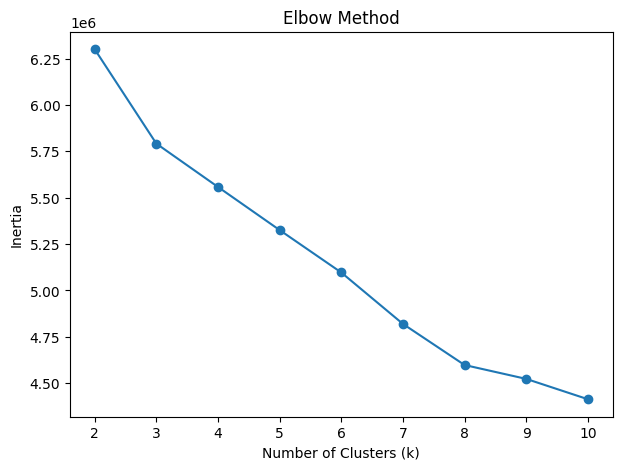

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(2, 11), inertia_scores, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

Insight:

This code computes K-Means inertia for k=2 to 10 and plots the Elbow Curve to identify the ideal number of clusters.
The curve shows a strong drop until k=2–3, after which the decrease slows, indicating that k = 2 is the optimal cluster choice.

In [11]:
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = {}
# random sample of 50,000 rows for silhouette calculation
sample_size = 50000
idx = np.random.choice(range(scaled_data.shape[0]), size=sample_size, replace=False)
scaled_sample = scaled_data[idx]

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_sample)
    silhouette_scores[k] = silhouette_score(scaled_sample, labels)

silhouette_scores

{2: np.float64(0.15047784157058053),
 3: np.float64(0.106470389719283),
 4: np.float64(0.12496825581055664),
 5: np.float64(0.10612166678336994),
 6: np.float64(0.10899064989058395),
 7: np.float64(0.1191730699172803),
 8: np.float64(0.1359599532191452),
 9: np.float64(0.14993026124431674),
 10: np.float64(0.16136013309338762)}

Insight:

Silhouette scores are highest at k = 2, confirming that two clusters provide the best separation and cohesion.
Lower scores for higher k values indicate that adding more clusters does not improve clustering quality.

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
df_copy["Cluster"] = kmeans.fit_predict(scaled_data)

df_copy.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,Cluster
0,2.0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,True,False,False,False,True,True,False,False,0
1,3.0,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,True,False,True,False,False,False,True,False,0
2,4.0,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,True,False,True,False,False,False,False,True,0
3,5.0,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,False,True,False,False,True,False,True,False,0
4,6.0,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,False,True,True,False,False,False,True,False,0


Insight:

K-Means with k = 2 is applied, and each customer is assigned to either Cluster 0 or Cluster 1 based on behavior patterns.
The updated DataFrame now includes a “Cluster” column, confirming that clustering has been successfully applied.

In [15]:
import plotly.express as px
import pandas as pd

# Perform PCA to reduce dimensions for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a dataframe for plotting
pca_df = pd.DataFrame({
    "PCA1": pca_data[:,0],
    "PCA2": pca_data[:,1],
    "Cluster": df_copy["Cluster"]
})
fig = px.scatter(
    pca_df,
    x="PCA1",
    y="PCA2",
    color="Cluster",
    title="Customer Segments (Interactive PCA Visualization)",
    opacity=0.7,
    width=800,
    height=500,
    color_continuous_scale="Viridis"
)
fig.update_traces(marker=dict(size=4))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Insight:

The PCA scatter plot reduces all features into two dimensions, allowing the clusters to be visualized visually.
Cluster 0 and Cluster 1 form distinct patterns along the PCA1 axis, confirming that the dataset naturally separates into two customer segments.

In [16]:
df_copy.groupby("Cluster").mean()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
Cluster,,,,,,,,,,,,,,,,,
0,129726.639651,41.798683,30.465294,15.458518,5.164225,15.256943,539.689180,15.624228,0.999206,0.511151,0.488845,0.332998,0.3326,0.334398,0.325753,0.350368,0.323875
1,349119.302111,36.236521,32.279291,16.258780,1.587358,10.002773,750.493937,13.002304,0.008328,0.330373,0.669627,0.313384,0.3433,0.343316,0.500512,0.000021,0.499467


Insight:

Cluster 0 shows higher support calls, payment delays, and churn—indicating high-risk customers with lower spending.
Cluster 1 has fewer complaints, lower churn, and higher spending, representing loyal and high-value customers.

In [17]:
import plotly.express as px

px.box(df_copy, x="Cluster", y="Total Spend", title="Cluster vs Total Spend")

Output hidden; open in https://colab.research.google.com to view.

Insight:

Cluster 1 customers spend significantly more on average than Cluster 0, indicating higher-value and more profitable users.
Cluster 0 shows a wider spread with many low spenders, reinforcing that it contains more low-value or churn-risk customers.

In [18]:
import plotly.express as px

cluster_mean = df_copy.groupby("Cluster").mean().reset_index()
fig = px.imshow(cluster_mean,
                labels=dict(x="Features", y="Cluster", color="Value"),
                title="Cluster Feature Comparison Heatmap")
fig.show()

Insight:

The heatmap clearly highlights that Cluster 1 has much higher Total Spend compared to Cluster 0, making it the high-value customer group.
Other features show smaller differences, but spending and churn remain the strongest indicators separating the two clusters.

## EDA

In [19]:
px.histogram(df_copy, x='Age', nbins=30, title='Age Distribution')
px.histogram(df_copy, x='Total Spend', nbins=30, title='Spend Distribution')

Output hidden; open in https://colab.research.google.com to view.

Insight: Helps understand customer demographics and spending behavior

<Axes: >

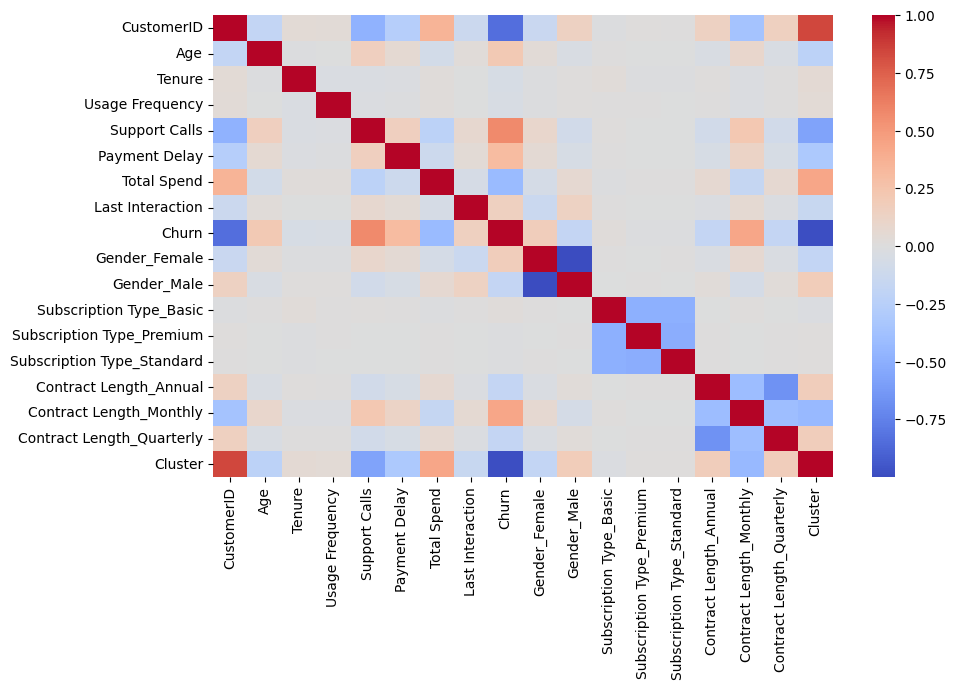

In [20]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df_copy.corr(), cmap='coolwarm')

Insight: Shows which features influence spending or churn.

<Axes: ylabel='Total Spend'>

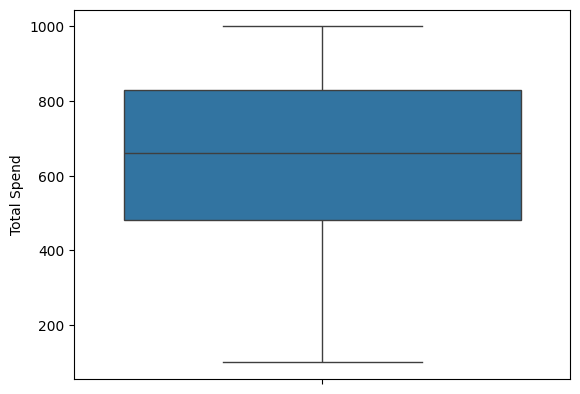

In [21]:
sns.boxplot(df_copy['Total Spend'])

Insight: Highlights extreme spenders or anomalies.

In [22]:
import plotly.express as px

cluster_counts = df_copy["Cluster"].value_counts().reset_index()
cluster_counts.columns = ["Cluster", "Count"]
fig = px.bar(cluster_counts, x="Cluster", y="Count", title="Customer Count per Cluster", text="Count")
fig.update_traces(textposition="outside")
fig.show()

Insight: Shows whether more customers are at risk (Cluster 0) or more are loyal (Cluster 1).

In [23]:
px.box(df_copy, x="Cluster", y="Support Calls", title="Cluster vs Support Calls")

Output hidden; open in https://colab.research.google.com to view.

Insight: Higher support calls in Cluster 0 indicate more complaints → higher churn risk.

In [24]:
px.scatter(
    df_copy,
    x="Payment Delay",
    y="Total Spend",
    color="Cluster",
    opacity=0.6,
    title="Payment Delay vs Total Spend (Cluster-wise)"
)

Output hidden; open in https://colab.research.google.com to view.

Insight: Identifies whether late-payers also tend to spend less → common churn pattern.